# 1. Import Libraries


In [1]:


import pandas as pd #as we will be working with dataste we need pandas
import numpy as np #for mathematical calculations
import seaborn as sns #for  better visualization
import matplotlib.pyplot as plt #for plotting gaphs
from sklearn.model_selection import train_test_split, cross_val_score #train and testing split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # for model evaluation
from sklearn.preprocessing import LabelEncoder #for data preprocessing
import xgboost as xgb #advanced boosting algo
import lightgbm as lgb




# 2. Load Datasets


In [2]:
test = pd.read_csv("/content/Titanic_test[1].csv") #loading testing  datset in dataframe called test
train = pd.read_csv("/content/Titanic_train[1].csv") #loading training datset in dataframe called train

In [4]:
df = pd.concat([train, test], sort=False) #combined both datasets into one dataframe called df for preprocessing puposes
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# 3. Exploratory Data Analysis


In [5]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


Visualizations using different graphs

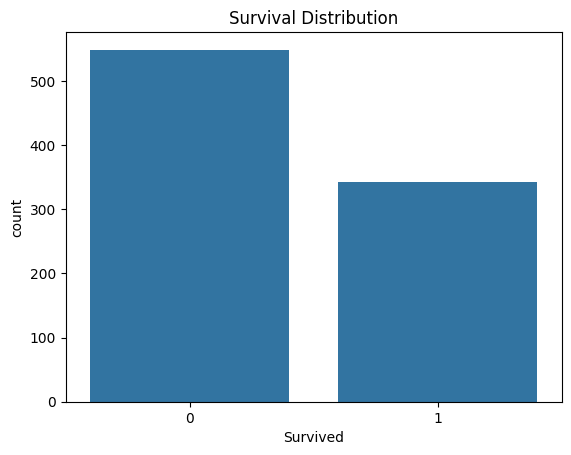

In [6]:
sns.countplot(data=train, x='Survived')
plt.title('Survival Distribution')
plt.show()

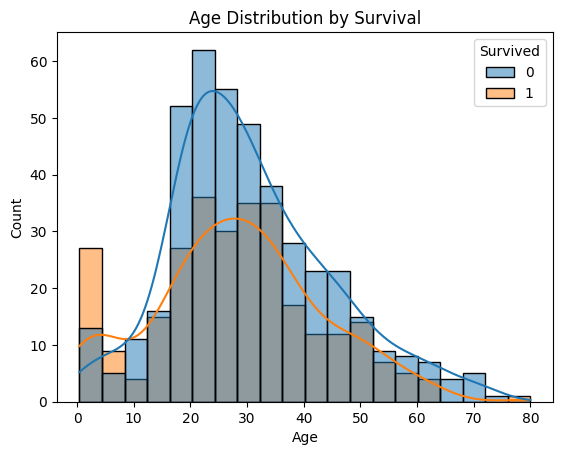

In [7]:
sns.histplot(data=train, x='Age', hue='Survived', kde=True) # plotting a histogram
plt.title('Age Distribution by Survival')
plt.show()

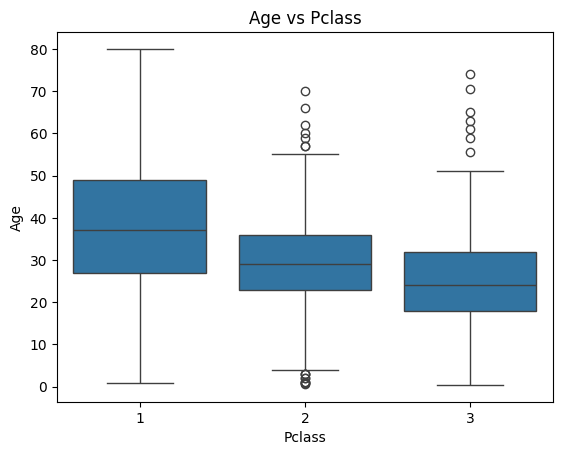

In [8]:
sns.boxplot(data=train, x='Pclass', y='Age') #plotting a box plot as it confirms whether outliers are there or not
plt.title('Age vs Pclass')
plt.show()

# 4. Data Preprocessing


In [9]:
df['Age'] = df['Age'].fillna(df['Age'].median()) #filling missing values
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [10]:
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True) ## Dropping unnecessary columns

In [11]:
le = LabelEncoder() ## Encode categorical features as  model requires data in nmerical format
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [12]:
train_cleaned = df[:len(train)] #resplit
test_cleaned = df[len(train):]

In [13]:
X = train_cleaned.drop('Survived', axis=1) #preprocessed data
y = train_cleaned['Survived']


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Step: Define features and target from cleaned train data
X = train_cleaned.drop('Survived', axis=1)
y = train_cleaned['Survived']

# Step: Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
!pip install lightgbm

# 6. LightGBM Model


In [17]:
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_val)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [18]:
print("\n✅ LightGBM Results:")
print("Accuracy:", accuracy_score(y_val, lgb_pred))
print(classification_report(y_val, lgb_pred))


✅ LightGBM Results:
Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       105
         1.0       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



# 7. XGBoost Model


In [19]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_val)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:10:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [20]:
print("\n✅ XGBoost Results:")
print("Accuracy:", accuracy_score(y_val, xgb_pred))
print(classification_report(y_val, xgb_pred))


✅ XGBoost Results:
Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       105
         1.0       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# 8. Confusion Matrices


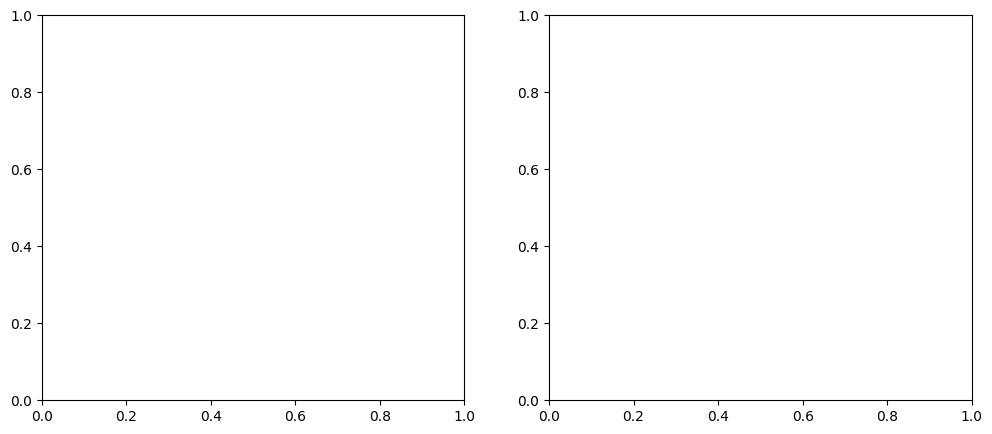

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

In [22]:
sns.heatmap(confusion_matrix(y_val, lgb_pred), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title("LightGBM Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

Text(120.72222222222221, 0.5, 'Actual')

In [23]:
sns.heatmap(confusion_matrix(y_val, xgb_pred), annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title("XGBoost Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

Text(627.9949494949494, 0.5, 'Actual')

In [25]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>